# 🚢 Titanic Survival Data Analysis

This notebook explores the Titanic dataset to answer a series of analytical questions related to passenger survival. Using Python libraries like `pandas`, `matplotlib`, and `seaborn`, I will visualize trends and investigate the impact of factors such as gender, class, age, and family presence on survival rates.


In [71]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set styles
plt.style.use('fivethirtyeight')
sns.set(style="whitegrid")
sns.set(color_codes=True)

# Load dataset
df = pd.read_csv('titanic.csv')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [34]:
# Drop duplicates
df.drop_duplicates(inplace=True)


In [35]:
#Fill missing values with median

#age
df['age'].fillna(df['age'].median(), inplace=True)

#deck
df['deck'].fillna(df['deck'].mode()[0], inplace=True)

#embarked
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

#embark_town
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

/tmp/ipython-input-35-3991597374.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipython-input-35-3991597374.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [36]:
#data type conversion
df['age'] = df['age'].astype(float)
df['fare'] = df['fare'].astype(float)
df['sibsp'] = df['sibsp'].astype(float)
df['parch'] = df['parch'].astype(float)
df['pclass'] = df['pclass'].astype(float)
df['survived'] = df['survived'].astype(float)
df['sex'] = df['sex'].astype('category')
df['embarked'] = df['embarked'].astype('category')
df['class'] = df['class'].astype('category')
df['who'] = df['who'].astype('category')
df['adult_male'] = df['adult_male'].astype(bool)
df['deck'] = df['deck'].astype('category')
df['embark_town'] = df['embark_town'].astype('category')
df['alive'] = df['alive'].astype('category')
df['alone'] = df['alone'].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     784 non-null    float64 
 1   pclass       784 non-null    float64 
 2   sex          784 non-null    category
 3   age          784 non-null    float64 
 4   sibsp        784 non-null    float64 
 5   parch        784 non-null    float64 
 6   fare         784 non-null    float64 
 7   embarked     784 non-null    category
 8   class        784 non-null    category
 9   who          784 non-null    category
 10  adult_male   784 non-null    bool    
 11  deck         784 non-null    category
 12  embark_town  784 non-null    category
 13  alive        784 non-null    category
 14  alone        784 non-null    bool    
dtypes: bool(2), category(7), float64(6)
memory usage: 50.9 KB


In [37]:
# Check missisng values
print(df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


## ❓ Research Questions

1. What is the survival rate of passengers?  
2. What is the gender distribution of passengers?  
3. How does survival rate differ by class?  
4. What is the distribution of passenger ages?  
5. How many passengers embarked from each location?  
6. What is the average fare paid per class?  
7. How does gender affect survival rates?  
8. What is the correlation between fare and survival?  
9. How does the number of siblings/spouses aboard affect survival?  
10. What is the age distribution by class?  
11. What is the survival rate by embarkation point?  
12. What is the impact of having parents/children aboard on survival?


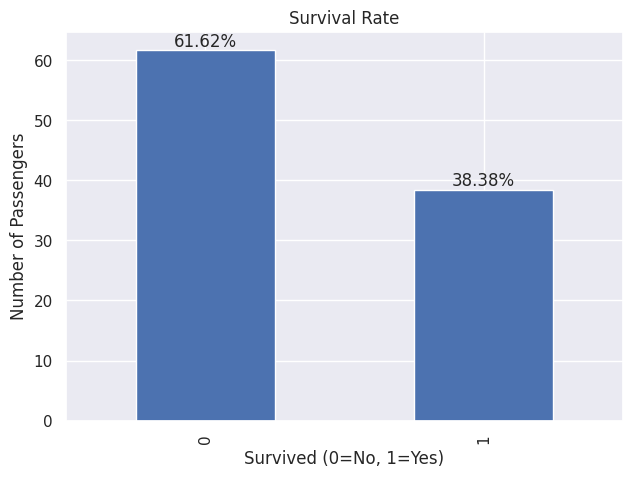

In [92]:
# 1. What is the survival rate of passengers? bar %
sur = df['survived'].value_counts(normalize=True) * 100
sur.plot(kind='bar', title='Survival Rate')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Number of Passengers')

for i, v in enumerate(sur):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
plt.show()

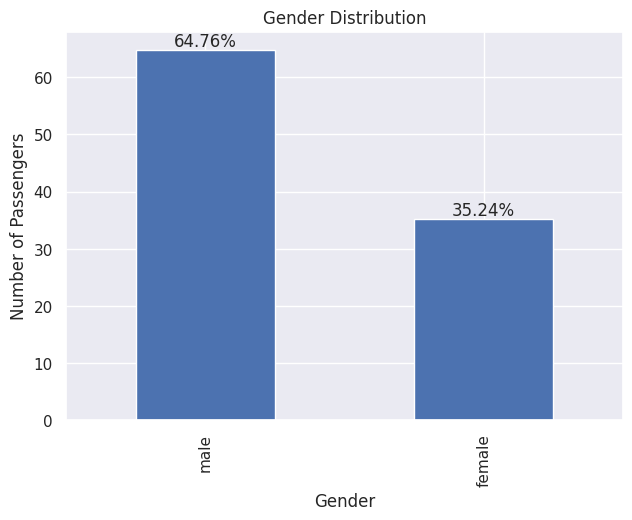

In [94]:
# 2. What is the gender distribution of passengers?
# gender distribution
gen = df['sex'].value_counts(normalize=True) * 100
gen.plot(kind='bar', title='Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')

for i, v in enumerate(gen):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
plt.show()

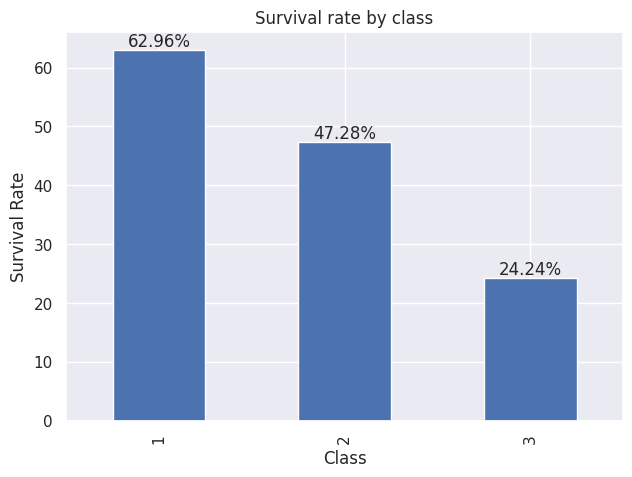

In [93]:
# 3. How does survival rate differ by class?
#%
surcl = df.groupby('pclass')['survived'].mean() * 100
surcl.plot(kind='bar', title='Survival rate by class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')

for i, v in enumerate(surcl):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
plt.show()

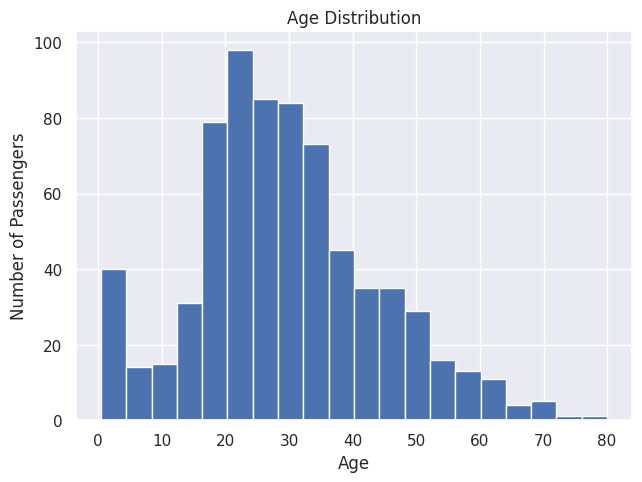

In [97]:
# 4. What is the distribution of passenger ages?

df['age'].plot(kind='hist', bins=20, title='Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

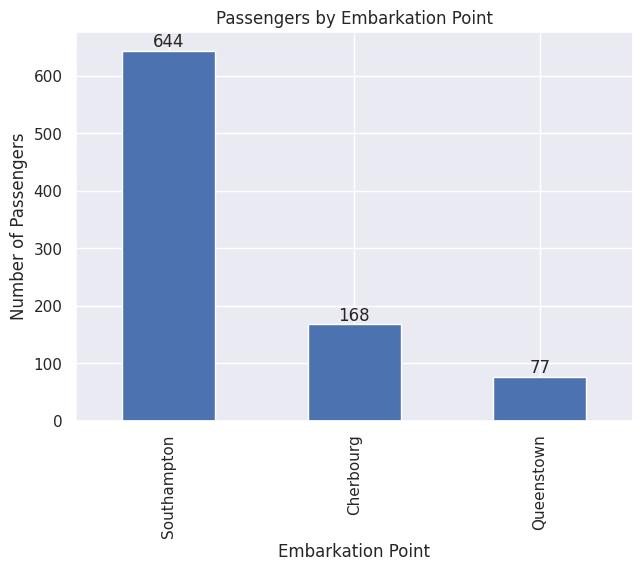

In [98]:
# 5. How many passengers embarked from each location?
emb = df['embark_town'].value_counts()
emb.plot(kind='bar', title='Passengers by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Number of Passengers')

for i, v in enumerate(emb):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

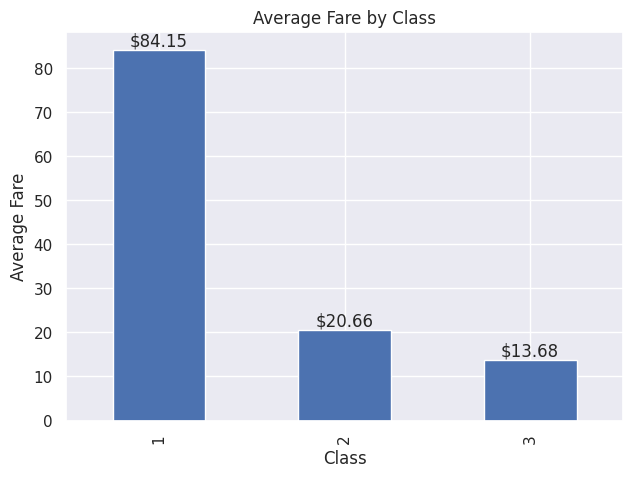

In [99]:
# 6. What is the average fare paid per class?
farecl = df.groupby('pclass')['fare'].mean()
farecl.plot(kind='bar', title='Average Fare by Class')
plt.xlabel('Class')
plt.ylabel('Average Fare')

for i, v in enumerate(farecl):
    plt.text(i, v, f'${v:.2f}', ha='center', va='bottom')
plt.show()

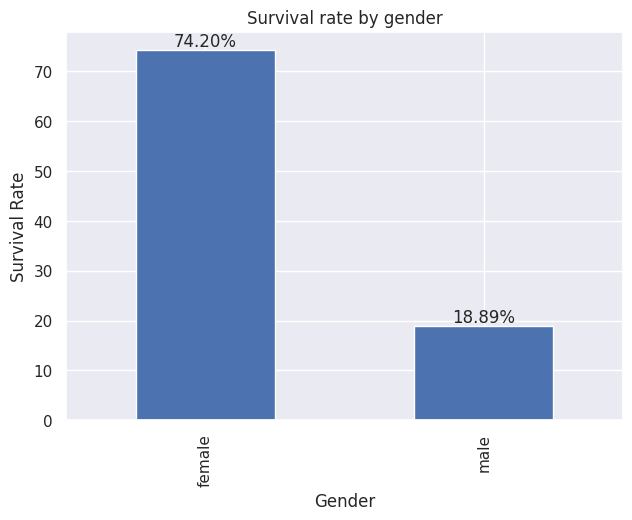

In [100]:
# 7. How does gender affect survival rates?
surgen = df.groupby('sex')['survived'].mean() * 100
surgen.plot(kind='bar', title='Survival rate by gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')

for i, v in enumerate(surgen):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
plt.show()

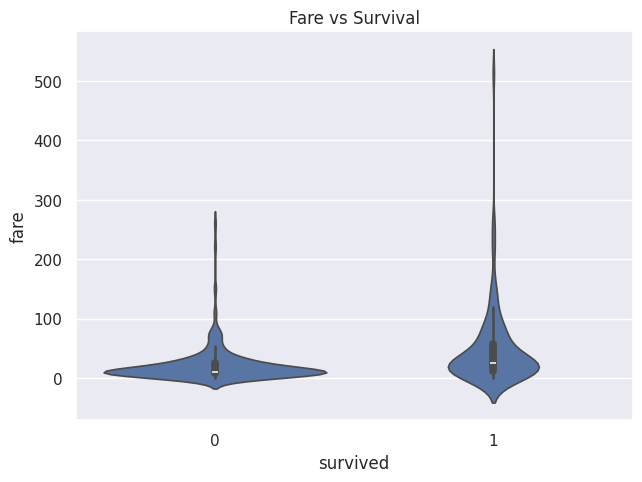

In [101]:
# 8. What is the correlation between fare and survival?
#violinplot
sns.violinplot(data=df, x='survived', y='fare')
plt.title('Fare vs Survival')
plt.show()

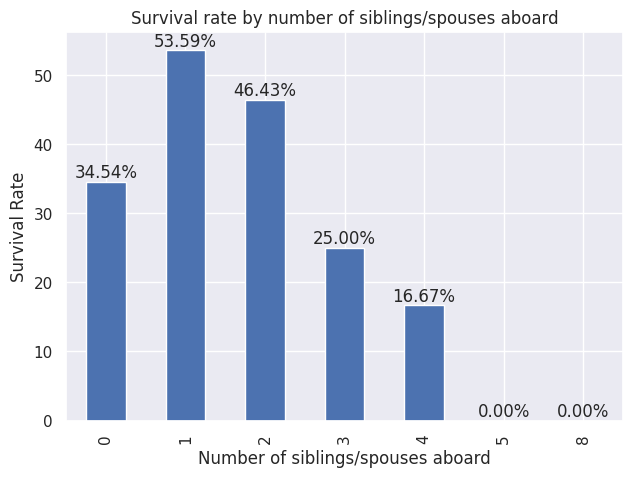

In [103]:
# 9. How does the number of siblings/spouses aboard affect survival rate?
sib = df.groupby('sibsp')['survived'].mean() * 100
sib.plot(kind='bar', title='Survival rate by number of siblings/spouses aboard')
plt.xlabel('Number of siblings/spouses aboard')
plt.ylabel('Survival Rate')

for i, v in enumerate(sib):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
plt.show()

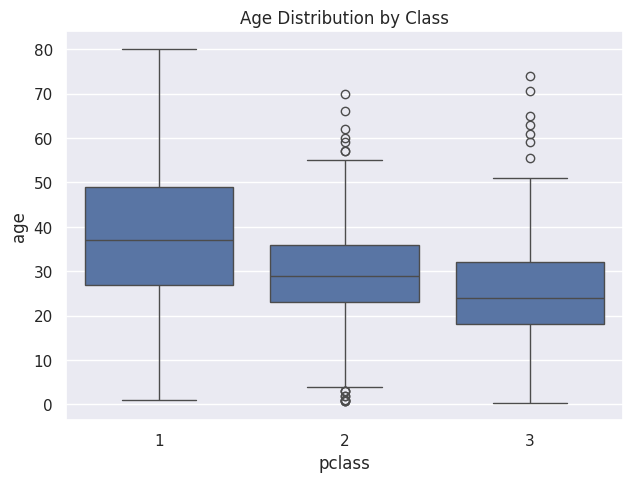

In [104]:
# 10. What is the age distribution by class?
sns.boxplot(data=df, x='pclass', y='age')
plt.title('Age Distribution by Class')
plt.show()

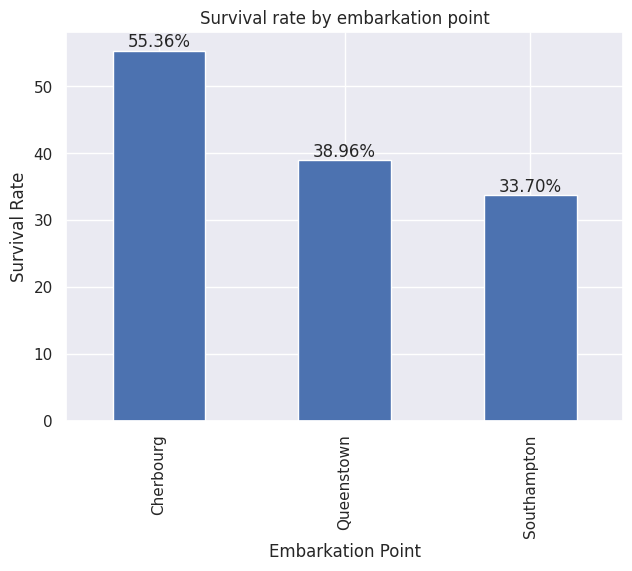

In [106]:
# 11. What is the survival rate by embarkation point?
emb = df.groupby('embark_town')['survived'].mean() * 100
emb.plot(kind='bar', title='Survival rate by embarkation point')
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate')

for i, v in enumerate(emb):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
plt.show()

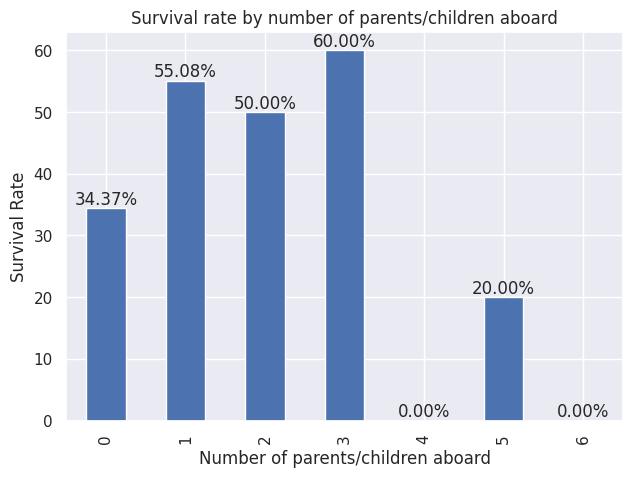

In [108]:
# 12. What is the impact of having parents/children aboard on survival?
par = df.groupby('parch')['survived'].mean() * 100
par.plot(kind='bar', title='Survival rate by number of parents/children aboard')
plt.xlabel('Number of parents/children aboard')
plt.ylabel('Survival Rate')

for i, v in enumerate(par):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
plt.show()